# Name:-

## Parth Suhas Mane

## Problem Statement:-

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


## Import libraries

In [1]:
# import necessary packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# import dataset
fraud_d = pd.read_csv('Fraud_check.csv')
fraud_d.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## EDA & Visualization

In [3]:
# data information
fraud_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


Data types of each column is correctly identified

In [4]:
# describe data
fraud_d.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
#check duplicated values
fraud_d.duplicated().sum()

0

There are no Duplicate rows in the dataset

In [6]:
#check correlation
fraud_d.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

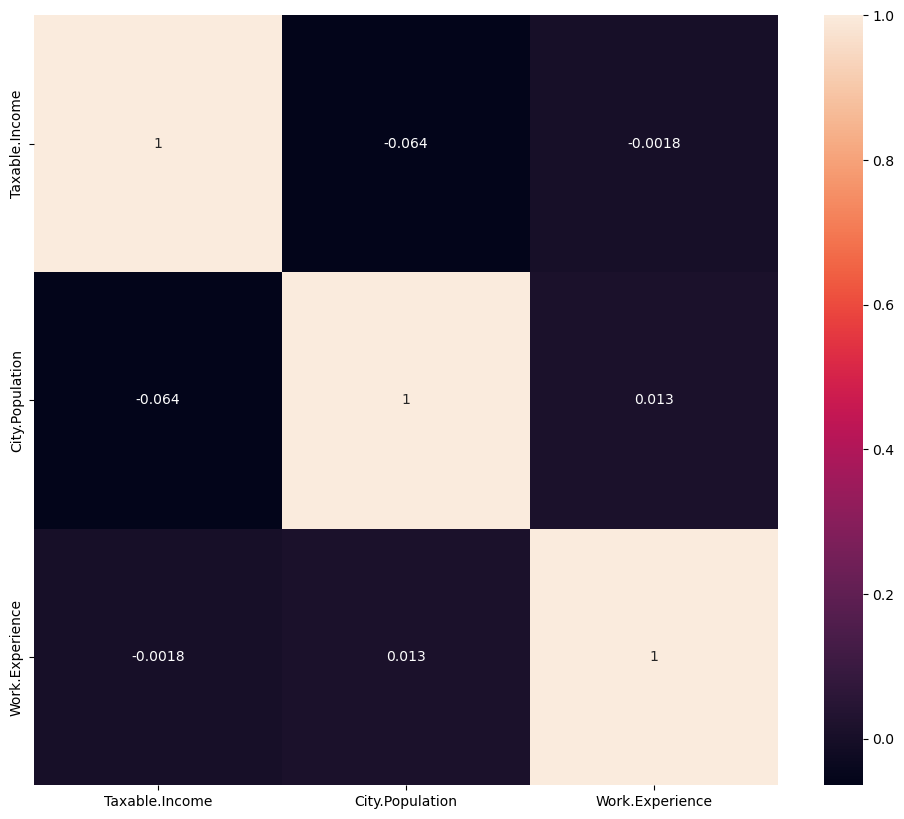

In [7]:
#Plot heatmap to see rectangular data as a color-encoded matrix.
plt.figure(figsize=(12,10))
sns.heatmap(fraud_d.corr(),annot=True)

<AxesSubplot:>

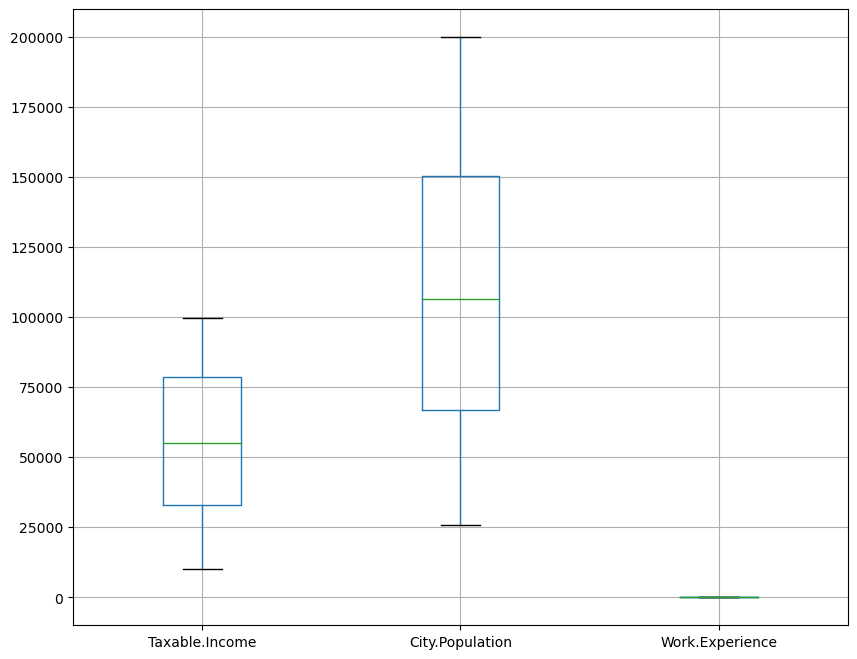

In [8]:
#plot boxplot to visualize distribution of all the numerical columnns at once..
plt.figure(figsize=(10,8))
pd.DataFrame(data=fraud_d,columns=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']).boxplot()

The distribution of segment population is widely distributed over all other segments.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


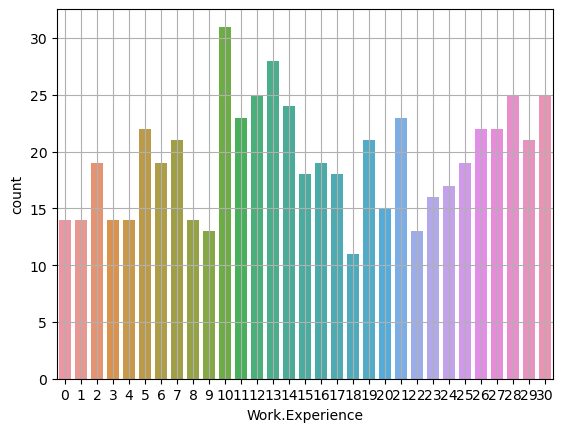

In [22]:
# count plot for Work Experience
sns.countplot(fraud_d['Work.Experience'])
plt.grid(True)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


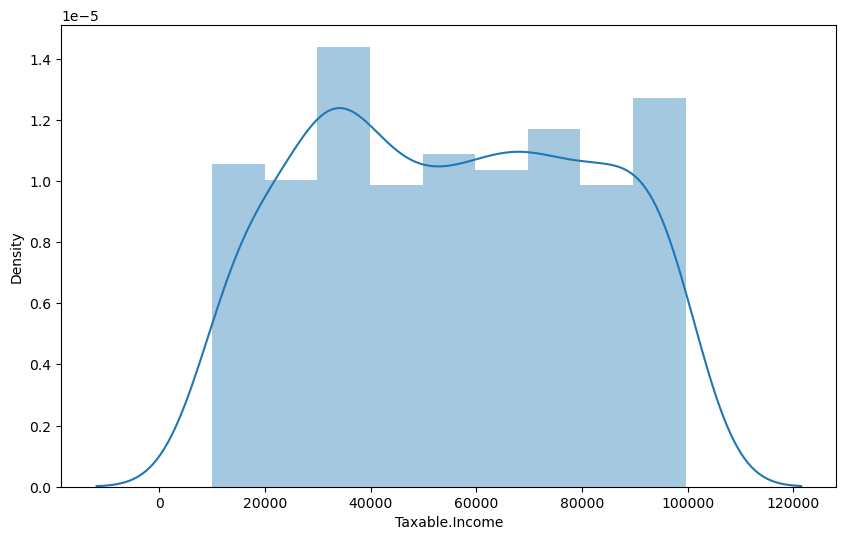

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(fraud_d['Taxable.Income'],)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


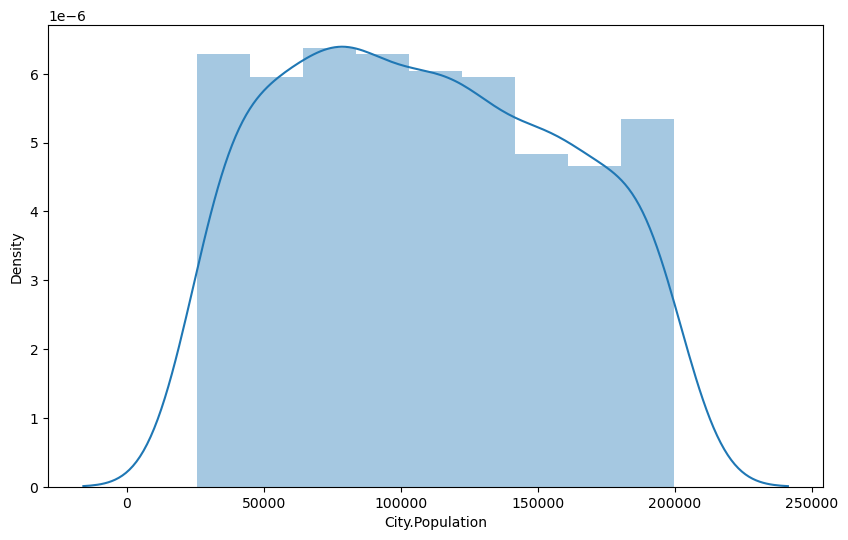

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(fraud_d['City.Population'],)
plt.show()

In [9]:
# Renamning the data
data2 = fraud_d.rename({'Marital.Status':'Maritial_status','Taxable.Income':'Taxable_income','City.Population':'City_population','Work.Experience':'Work_experience'},axis = 1)
data2

,Undergrad,Maritial_status,Taxable_income,City_population,Work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [10]:
# converting the catogotical data into numerical 
data2['Undergrad'] = data2['Undergrad'].map({'NO':0,'YES':1})
data2['Maritial_status'] = data2['Maritial_status'].map({'Single':1,'Divorced':0,'Married':2})
data2['Urban'] = data2['Urban'].map({'YES':1,'NO':0})

In [11]:
data2

,Undergrad,Maritial_status,Taxable_income,City_population,Work_experience,Urban
0,0,1,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,2,36925,160205,30,1
3,1,1,50190,193264,15,1
4,0,2,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,2,98592,180083,17,0


In [12]:
# convering the catogorical data to numeric data according to problem statement
data2["taxable_income"]="GOOD"
data2.loc[data2["Taxable_income"]<=30000,"taxable_income"]="Risky"
data2.drop(['Taxable_income'],axis = 1,inplace = True)

In [13]:
data2

,Undergrad,Maritial_status,City_population,Work_experience,Urban,taxable_income
0,0,1,50047,10,1,GOOD
1,1,0,134075,18,1,GOOD
2,0,2,160205,30,1,GOOD
3,1,1,193264,15,1,GOOD
4,0,2,27533,28,0,GOOD
...,...,...,...,...,...,...
595,1,0,39492,7,1,GOOD
596,1,0,55369,2,1,GOOD
597,0,0,154058,0,1,GOOD
598,1,2,180083,17,0,GOOD


In [14]:
# input variables 
X  = data2.iloc[:,0:5]
X

,Undergrad,Maritial_status,City_population,Work_experience,Urban
0,0,1,50047,10,1
1,1,0,134075,18,1
2,0,2,160205,30,1
3,1,1,193264,15,1
4,0,2,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,2,180083,17,0


In [15]:
# Target variables
Y = data2.iloc[:,5]
Y

0      GOOD
1      GOOD
2      GOOD
3      GOOD
4      GOOD
       ... 
595    GOOD
596    GOOD
597    GOOD
598    GOOD
599    GOOD
Name: taxable_income, Length: 600, dtype: object

In [16]:
# splitting the data into train and test split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state = 2)

In [17]:
# Builfing a model or creating a model
RD = RandomForestClassifier(n_estimators=100,max_features=3)
RD.fit(x_train,y_train)# fitting on train data

RandomForestClassifier(max_features=3)

In [18]:
predict = RD.predict(x_test)# predicting on data
np.mean(predict==y_test)*100  # accurcy on a test data

76.26262626262627

In [19]:
# actual vs predicted
df_t = pd.DataFrame({'Actual':y_test, 'Predicted':predict})
df_t

,Actual,Predicted
449,GOOD,GOOD
141,GOOD,Risky
131,GOOD,GOOD
311,GOOD,GOOD
176,GOOD,Risky
...,...,...
295,GOOD,Risky
199,Risky,GOOD
69,GOOD,GOOD
14,GOOD,GOOD


### Model is working correctly

## Confusion Matrix, Accuracy and f1 score

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [28]:
y_pred = RD.predict(x_test)

In [29]:
accuracy_score(y_test,y_pred)

0.7626262626262627

Our Model has 76 Percent accuracy

In [30]:
confusion_matrix(y_test,y_pred)

array([[150,   8],
       [ 39,   1]], dtype=int64)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        GOOD       0.79      0.95      0.86       158
       Risky       0.11      0.03      0.04        40

    accuracy                           0.76       198
   macro avg       0.45      0.49      0.45       198
weighted avg       0.66      0.76      0.70       198

